# Part I

### Question 1

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,600,1)])
np.random.seed(10) #Setting seed for reproducability
y1 = np.sin(x) + np.random.normal(0,0.15,len(x))
y2 = np.cos(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y1,y2]),columns=['x','y1','y2'])

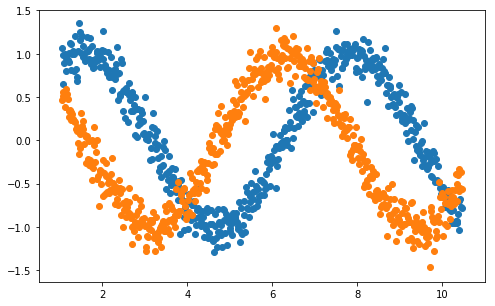

In [3]:
plt.figure(figsize=(8,5))
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.show()

### Question 2

In [4]:
X = pd.DataFrame(np.concatenate((np.column_stack([x,y1]),np.column_stack([x,y2]))),columns=['x','y'])
y = np.array([1]*len(x) + [2]*len(x))

In [5]:
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = (x_max / x_min)/10000
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [6]:
radial = svm.SVC(kernel='rbf', gamma=1).fit(X,y)

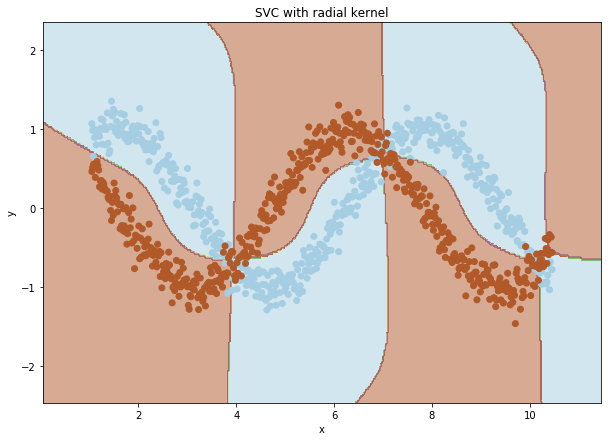

In [7]:
plt.figure(figsize=(10,7))
plt.subplot(1, 1, 1)
Z = radial.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with radial kernel')
plt.show()

### Question 3

In [8]:
sigmoid = svm.SVC(kernel='sigmoid').fit(X,y)

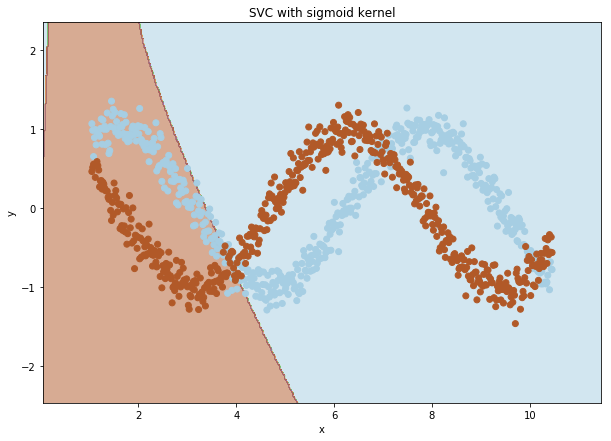

In [9]:
plt.figure(figsize=(10,7))
plt.subplot(1, 1, 1)
Z = sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with sigmoid kernel')
plt.show()

### Question 4

In [10]:
polynomial = svm.SVC(kernel='poly', degree=5).fit(X,y)

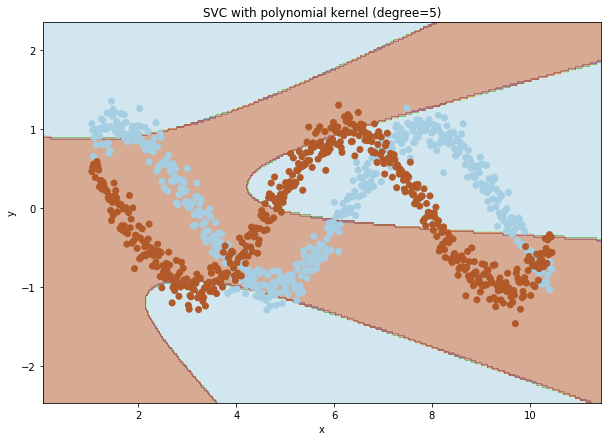

In [11]:
plt.figure(figsize=(10,7))
plt.subplot(1, 1, 1)
Z = polynomial.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with polynomial kernel (degree=5)')
plt.show()

### Question 5

In [12]:
polynomial_2 = svm.SVC(kernel='poly', degree=3).fit(X,y)

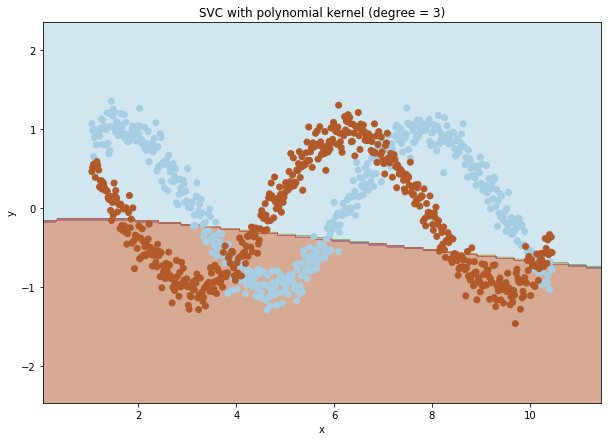

In [13]:
plt.figure(figsize=(10,7))
plt.subplot(1, 1, 1)
Z = polynomial_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with polynomial kernel (degree = 3)')
plt.show()

# Part II

### Question 1

In [2]:
from sklearn.utils import shuffle
from sklearn import linear_model
from sklearn import preprocessing

In [40]:
height_data = pd.read_csv('session7_homework.csv',index_col=0).loc[:,['childHeight','midparentHeight','gender']]

# seperate the classes for the scatter plot (Maybe there are better ways...)
female = height_data[height_data.gender=='female']
male = height_data[height_data.gender=='male']

In [41]:
X = height_data.iloc[:,:2]
le = preprocessing.LabelEncoder().fit(height_data.gender)
y = le.transform(height_data.gender)

In [42]:
# shuffle the dataset
X, y = shuffle(X, y, random_state=5)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [43]:
reg = linear_model.LogisticRegression()
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.8828571428571429

In [44]:
reg.score(X_test,y_test)

0.8803418803418803

### Question 2

First, take a rough look before tunning the parameters

In [45]:
radial = svm.SVC(kernel='rbf', gamma=0.1).fit(X,y)

In [46]:
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

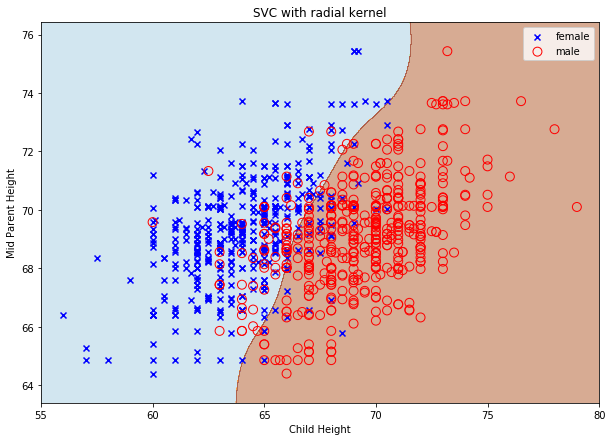

In [47]:
plt.figure(figsize=(10,7))
plt.subplot(1, 1, 1)
Z = radial.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
fig1 = plt.scatter(female.iloc[:, 0], female.iloc[:, 1], c='b', marker = 'x')
fig2 = plt.scatter(male.iloc[:, 0], male.iloc[:, 1], c='', marker = 'o', edgecolors = 'r', s=80)
plt.xlabel('Child Height')
plt.ylabel('Mid Parent Height')
plt.legend([fig1,fig2],['female','male'])
plt.xlim(xx.min(), xx.max())
plt.title('SVC with radial kernel')
plt.show()

Parameter Tuning

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report



# Set the parameters by cross-validation
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                'C': [1, 5, 10]},
              {'kernel': ['linear'], 'C': [1, 5, 10, 100]},
              {'kernel':['poly'], 'degree':[2, 3]}]

print("# Tuning hyper-parameters")
print()

clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on training set:

0.853 (+/-0.049) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.879 (+/-0.055) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.880 (+/-0.033) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.887 (+/-0.035) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.883 (+/-0.052) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.876 (+/-0.041) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.867 (+/-0.049) for {'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}
0.876 (+/-0.042) for {'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}
0.883 (+/-0.035) for {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}
0.884 (+/-0.055) for {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
0.879 (+/-0.042) for {'C': 5, 'gamma': 0.2, 'kernel': 'rbf'}
0.867 (+/-0.037) for {'C': 5, 'gamma': 0.5, 'kernel': 'rbf'}
0.877 (+/-0.051) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.877 (+/-0.041) for {'C': 10, 'gamma': 0.001,

In [49]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.90      0.89      0.89       119
          1       0.89      0.90      0.89       115

avg / total       0.89      0.89      0.89       234




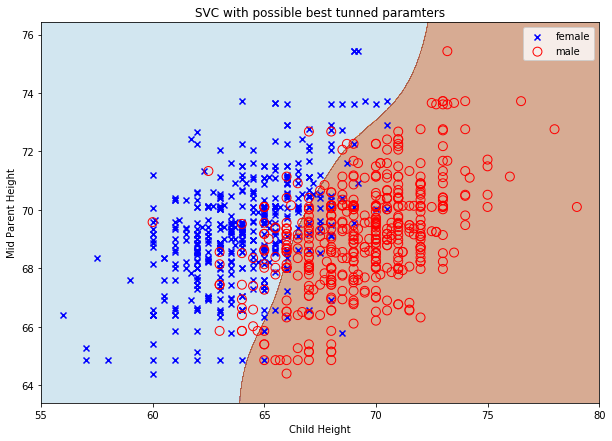

In [50]:
plt.figure(figsize=(10,7))
plt.subplot(1, 1, 1)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
fig1 = plt.scatter(female.iloc[:, 0], female.iloc[:, 1], c='b', marker = 'x')
fig2 = plt.scatter(male.iloc[:, 0], male.iloc[:, 1], c='', marker = 'o', edgecolors = 'r', s=80)
plt.xlabel('Child Height')
plt.ylabel('Mid Parent Height')
plt.legend([fig1,fig2],['female','male'])
plt.xlim(xx.min(), xx.max())
plt.title('SVC with possible best tunned paramters')
plt.show()